In [1]:
import os
import subprocess
import yaml
import shutil
from IPython.display import Image

In [2]:
# set the path to the model 
model_folder_path = "/home/boltzmann/webng_work/webng/stest/meeting"
# set the model name
model_name = "test.bngl"
# let's go to the model path
os.chdir(model_folder_path)
print(os.getcwd())

/home/boltzmann/webng_work/webng/stest/meeting


In [3]:
# config 
config_name = "mysim.yaml"
# let's make our template, note that capture_output requires at least python 3.7
rc = subprocess.run(["webng", "template", "-i", model_name, "-o", config_name], capture_output=True)
assert rc.returncode == 0, "Template generation failed"
print(rc.stdout.decode("utf-8"))

BioNetGen version 2.6.0
Reading from file /tmp/tmpw9fkalpc/test.bngl (level 0)
Read 7 parameters.
Read 8 molecule types.
Read 8 species.
Read 2 observable(s).
Read 12 reaction rule(s).
Wrote model in xml format to ./test.xml.
Finished processing file /tmp/tmpw9fkalpc/test.bngl.
CPU TIME: total 0.03 s.



In [4]:
# we can take a look at the config file here
with open(config_name, "r") as f:
    conf = yaml.load(f)
# we will skip analysis for now
print("Binning options")
print(yaml.dump(conf['binning_options']))
print("Path options")
print(yaml.dump(conf['path_options']))
print("Sampling options")
print(yaml.dump(conf['sampling_options']))

Binning options
block_size: 10
center_freq: 1
max_centers: 300
traj_per_bin: 100

Path options
WESTPA_path: /home/boltzmann/apps/anaconda3/lib/python3.7
bng_path: /home/boltzmann/apps/anaconda3/lib/python3.7/site-packages/bionetgen/bng-linux
bngl_file: /home/boltzmann/webng_work/webng/stest/test.bngl
sim_name: /home/boltzmann/webng_work/webng/stest/test

Sampling options
dimensions: 2
max_iter: 100
pcoord_length: 10
tau: 100



/home/boltzmann/apps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
conf["sampling_options"]["max_iter"] = 100
with open(config_name, "w") as f:
    yaml.dump(conf, f)


In [7]:
# you need to ensure the folder doesn't exist already, webng won't overwrite the folder
if os.path.isdir("test"):
    shutil.rmtree("test")
# let's setup our simulation
rc = subprocess.run(["webng", "setup", "--opts", config_name], capture_output=True)
assert rc.returncode == 0, "Simulation setup failed"
print(rc.stdout.decode("utf-8"))

BioNetGen version 2.6.0
Reading from file /tmp/tmpmk73c_n7/test.bngl (level 0)
Read 7 parameters.
Read 8 molecule types.
Read 8 species.
Read 2 observable(s).
Read 12 reaction rule(s).
Wrote model in xml format to ./test.xml.
Finished processing file /tmp/tmpmk73c_n7/test.bngl.
CPU TIME: total 0.01 s.
BioNetGen version 2.6.0
Reading from file /home/boltzmann/webng_work/webng/stest/test/bngl_conf/init.bngl (level 0)
Read 7 parameters.
Read 8 molecule types.
Read 8 species.
Read 2 observable(s).
Read 12 reaction rule(s).
ACTION: generate_network( init )
Iteration   0:     8 species      0 rxns  0.00e+00 CPU s
Iteration   1:     8 species     16 rxns  1.00e-02 CPU s
Cumulative CPU time for each rule
Rule   1:     2 reactions 1.00e-02 CPU s 5.00e-03 CPU s/rxn
Rule   2:     2 reactions 0.00e+00 CPU s 0.00e+00 CPU s/rxn
Rule   3:     1 reactions 0.00e+00 CPU s 0.00e+00 CPU s/rxn
Rule   4:     1 reactions 0.00e+00 CPU s 0.00e+00 CPU s/rxn
Rule   5:     1 reactions 0.00e+00 CPU s 0.00e+00 CPU 

In [8]:
# we got our folder, let's check it
os.chdir("test")
os.listdir(os.getcwd())

['libRR_propagator.py',
 'west.cfg',
 'bngl_conf',
 'restart_plugin.py',
 'bstates',
 'run.sh',
 'env.sh',
 'system.py',
 'init.sh',
 'aux_functions.py']

In [9]:
# now we can initialize the WESTPA run
rc = subprocess.run(["./init.sh"], capture_output=True)
assert rc.returncode == 0, "Initialization failed"
print(rc.stdout.decode("utf-8"))

System is being built only off of the system driver
Creating HDF5 file '/home/boltzmann/webng_work/webng/stest/test/west.h5'
0 target state(s) present
Calculating progress coordinate values for basis states.
1 basis state(s) present
Preparing initial states
Total number of groups: 1

        Total bins:            1
        Initial replicas:      100 in 1 bins, total weight = 1
        Total target replicas: 100
        
Simulation prepared.
1 of 1 (100.000000%) active bins are populated
per-bin minimum non-zero probability:       1
per-bin maximum probability:                1
per-bin probability dynamic range (kT):     0
per-segment minimum non-zero probability:   0.01
per-segment maximum non-zero probability:   0.01
per-segment probability dynamic range (kT): 0
norm = 1, error in norm = -1.11022e-16 (-0.5*epsilon)



In [9]:
# now our simulation is ready to run
rc = subprocess.run(["w_run", "--serial"])
assert rc.returncode == 0, "Simulation run failed"
print(rc.stdout.decode("utf-8"))

System is being built only off of the system driver
-- WARNING  [westpa.westext.adaptvoronoi.adaptVor_driver] -- Initializing voronoi centers from data failed;                         Using definition in system instead.
westext.adaptvoronoi: Updating bin mapper

-adaptive voronoi mapping --------------

enabled: True

max centers: 300

center adding freq: 1

centers: [[ 4. 18.]]

----------------------------------------

Maximum wallclock time: 3 days, 0:00:00

Fri Aug 27 14:21:56 2021
Iteration 1 (10 requested)
Beginning iteration 1
100 segments remain in iteration 1 (100 total)
1 of 1 (100.000000%) active bins are populated
per-bin minimum non-zero probability:       1
per-bin maximum probability:                1
per-bin probability dynamic range (kT):     0
per-segment minimum non-zero probability:   0.01
per-segment maximum non-zero probability:   0.01
per-segment probability dynamic range (kT): 0
norm = 1, error in norm = -1.11022e-16 (-0.5*epsilon)
Total number of groups: 1
west

In [9]:
# now we can work on analysis, let's go back to webng folder
os.chdir(model_folder_path)
# we need to rewrite the config file, enabling analyses
print(conf["analyses"])
# first we enable analyses in general
conf["analyses"]["enabled"] = True
# next we enable static averaging
conf["analyses"]["average"]["enabled"] = True
# next we enable moving averages
conf["analyses"]["evolution"]["enabled"] = True
# let's change a couple other options
conf["analyses"]["average"]["normalize"] = True
conf["analyses"]["average"]["plot-voronoi"] = True
conf["analyses"]["average"]["plot-energy"] = False
conf["analyses"]["average"]["first-iter"] = 400
conf["analyses"]["average"]["smoothing"] = 0.5
conf["analyses"]["evolution"]["normalize"] = True
conf["analyses"]["evolution"]["plot-energy"] = False
# let's rewrite the config file
with open(config_name, "w") as f:
    yaml.dump(conf, f)

{'average': {'dimensions': None, 'enabled': True, 'first-iter': 300, 'last-iter': None, 'mapper-iter': None, 'normalize': True, 'output': 'average.png', 'plot-energy': False, 'plot-opts': {'name-font-size': 12, 'voronoi-col': 0.75, 'voronoi-lw': 1}, 'plot-voronoi': True, 'smoothing': 0.5}, 'cluster': {'assignments': None, 'cluster-count': 2, 'enabled': False, 'first-iter': None, 'last-iter': None, 'metastable-states-file': None, 'normalize': None, 'states': [{'coords': [[20.0, 4.0]], 'label': 'a'}, {'coords': [[4.0, 20.0]], 'label': 'b'}], 'symmetrize': None, 'transition-matrix': None}, 'enabled': True, 'evolution': {'avg_window': 1, 'dimensions': None, 'enabled': True, 'normalize': True, 'output': 'evolution.png', 'plot-energy': False, 'plot-opts': {'name-font-size': 12}}, 'network': {'enabled': False, 'metastable-states-file': None, 'pcca-pickle': None, 'state-labels': None}, 'work-path': None}


In [10]:
# let's setup our analyses
rc = subprocess.run(["webng", "analysis", "--opts", config_name], capture_output=True)
assert rc.returncode == 0, "Analyses failed"
print(rc.stdout.decode("utf-8"))

running analyses
running analysis: average
Loading file /home/boltzmann/webng_work/webng/stest/test/west.h5, mapper from iteration 500
Plotting 1 vs 1
Plotting 1 vs 2
Plotting 2 vs 1
Plotting 2 vs 2
Saving figure to average.png
running analysis: evolution
Plotting dimension 1
Plotting dimension 2
Saving figure to evolution.png



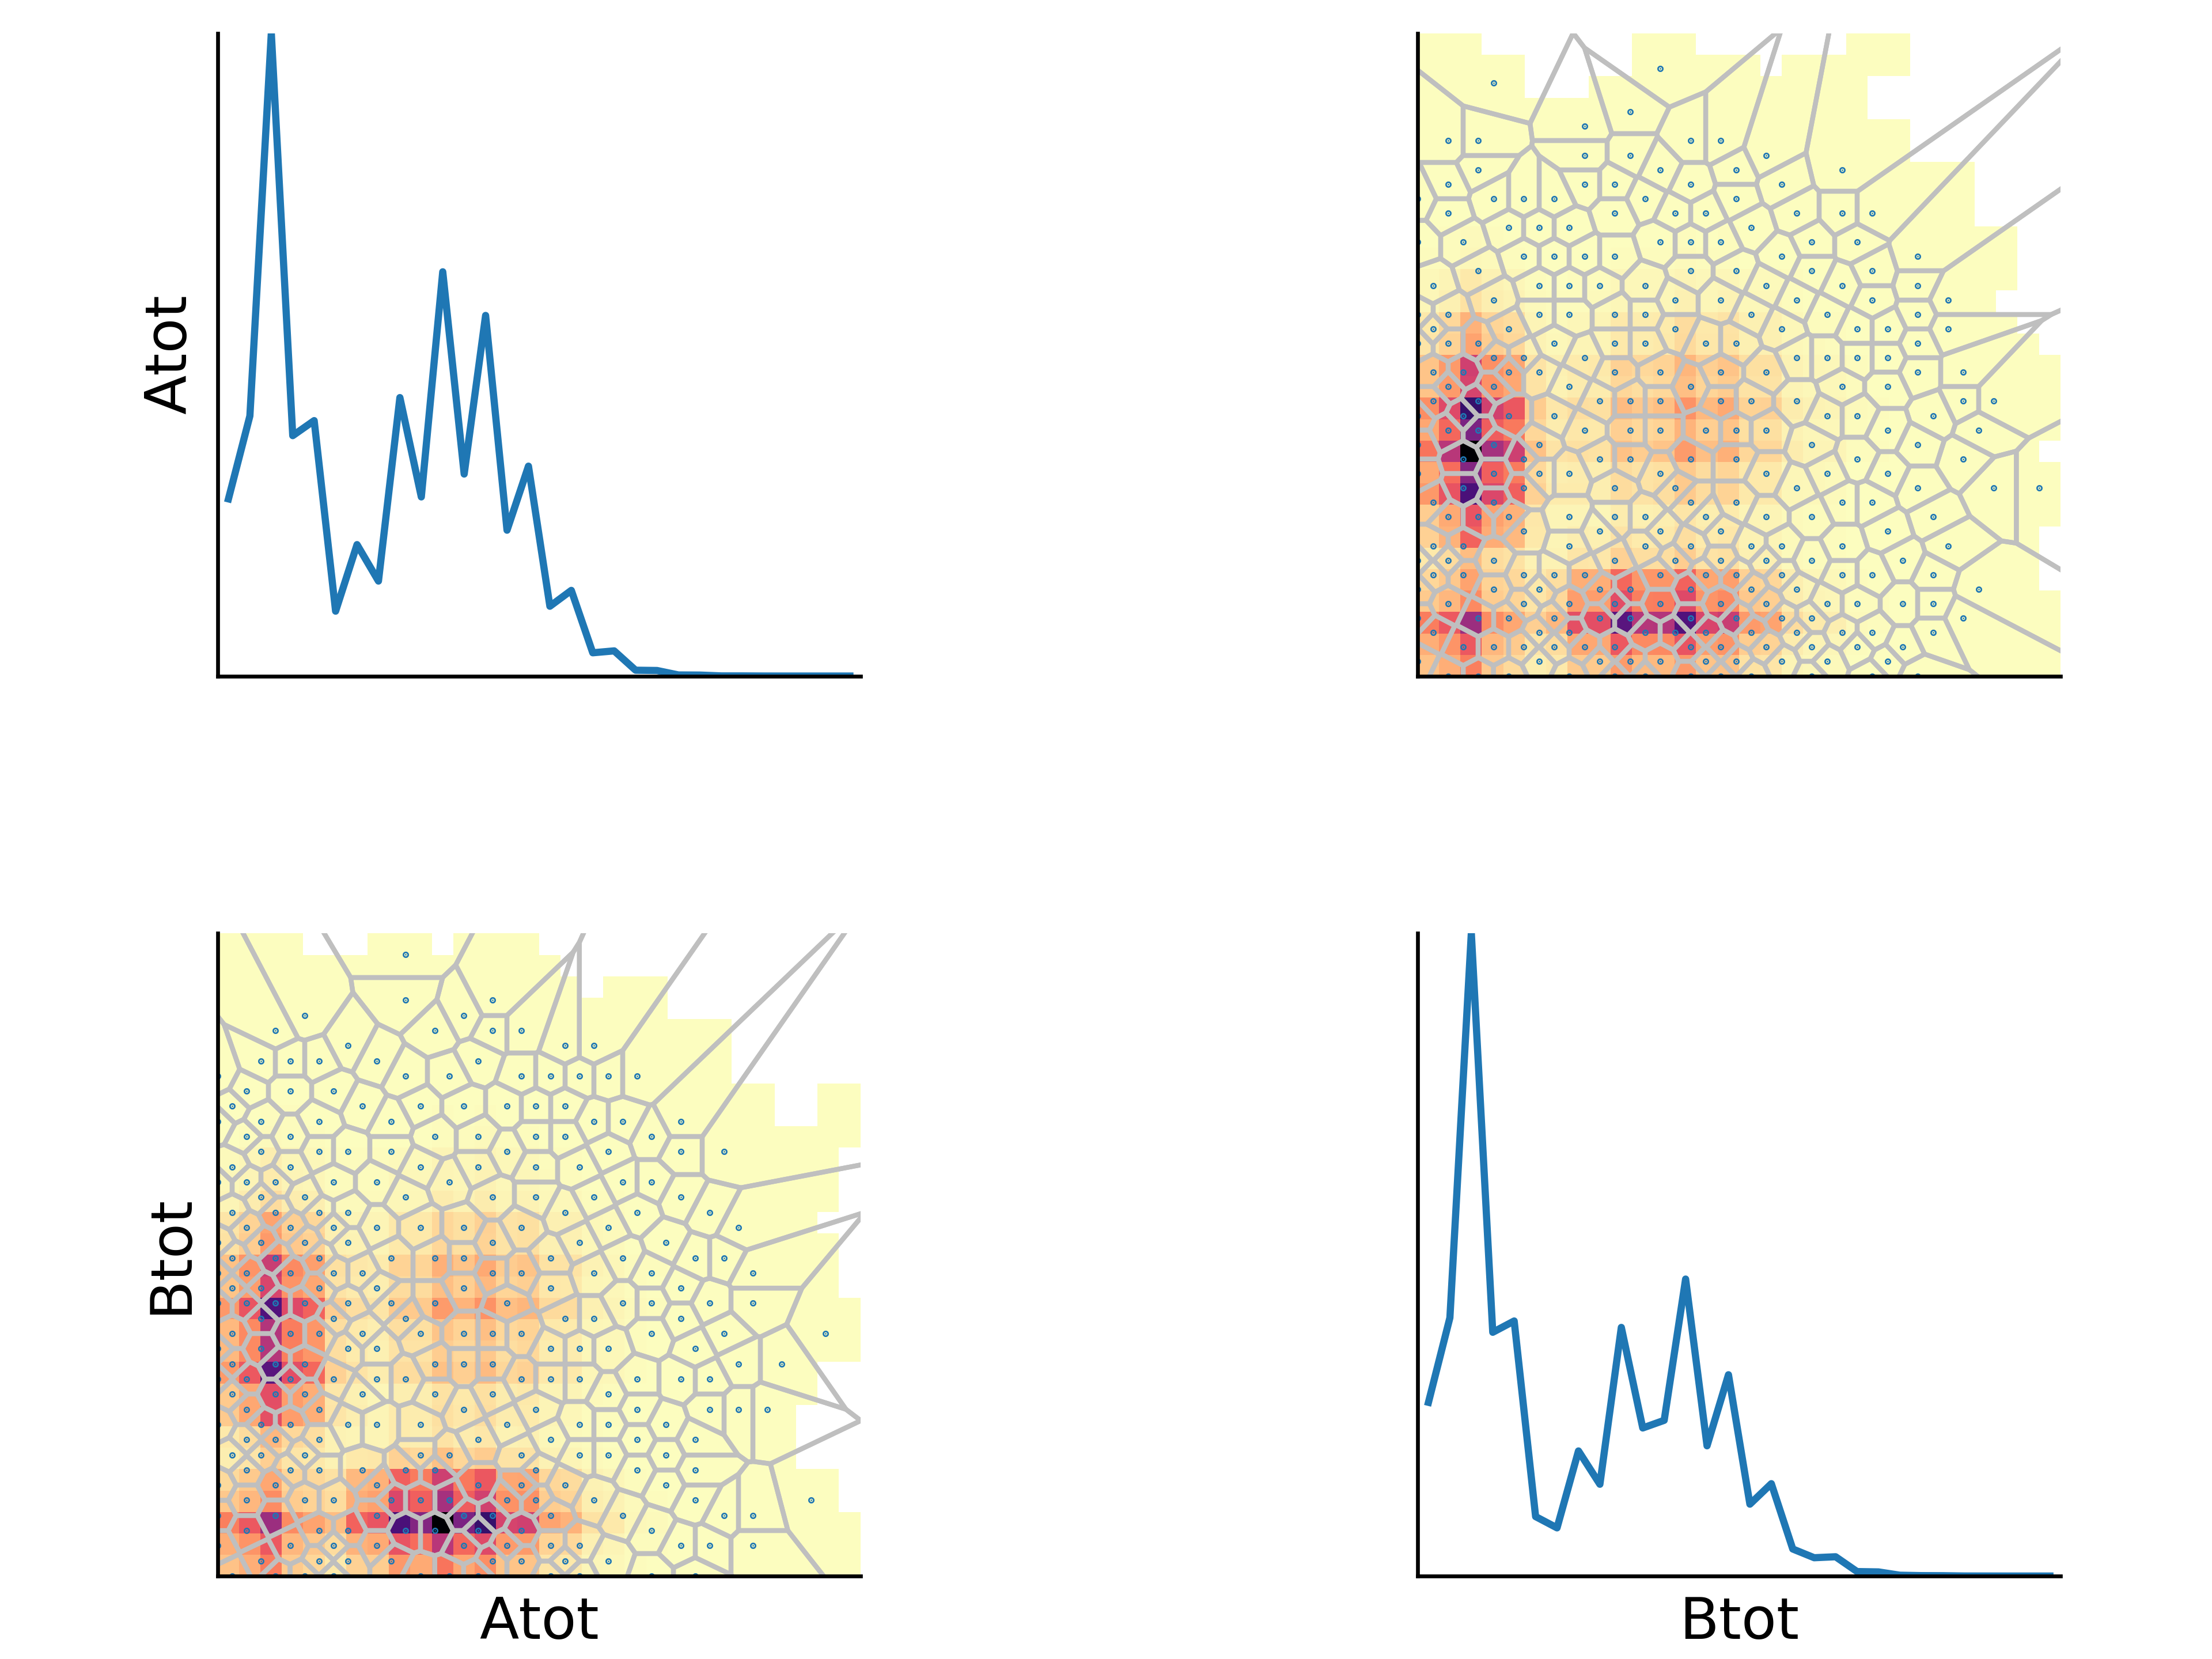

In [11]:
analysis_folder = os.path.join(*[model_folder_path,"test","analysis"])
os.chdir(analysis_folder)
Image("average.png")

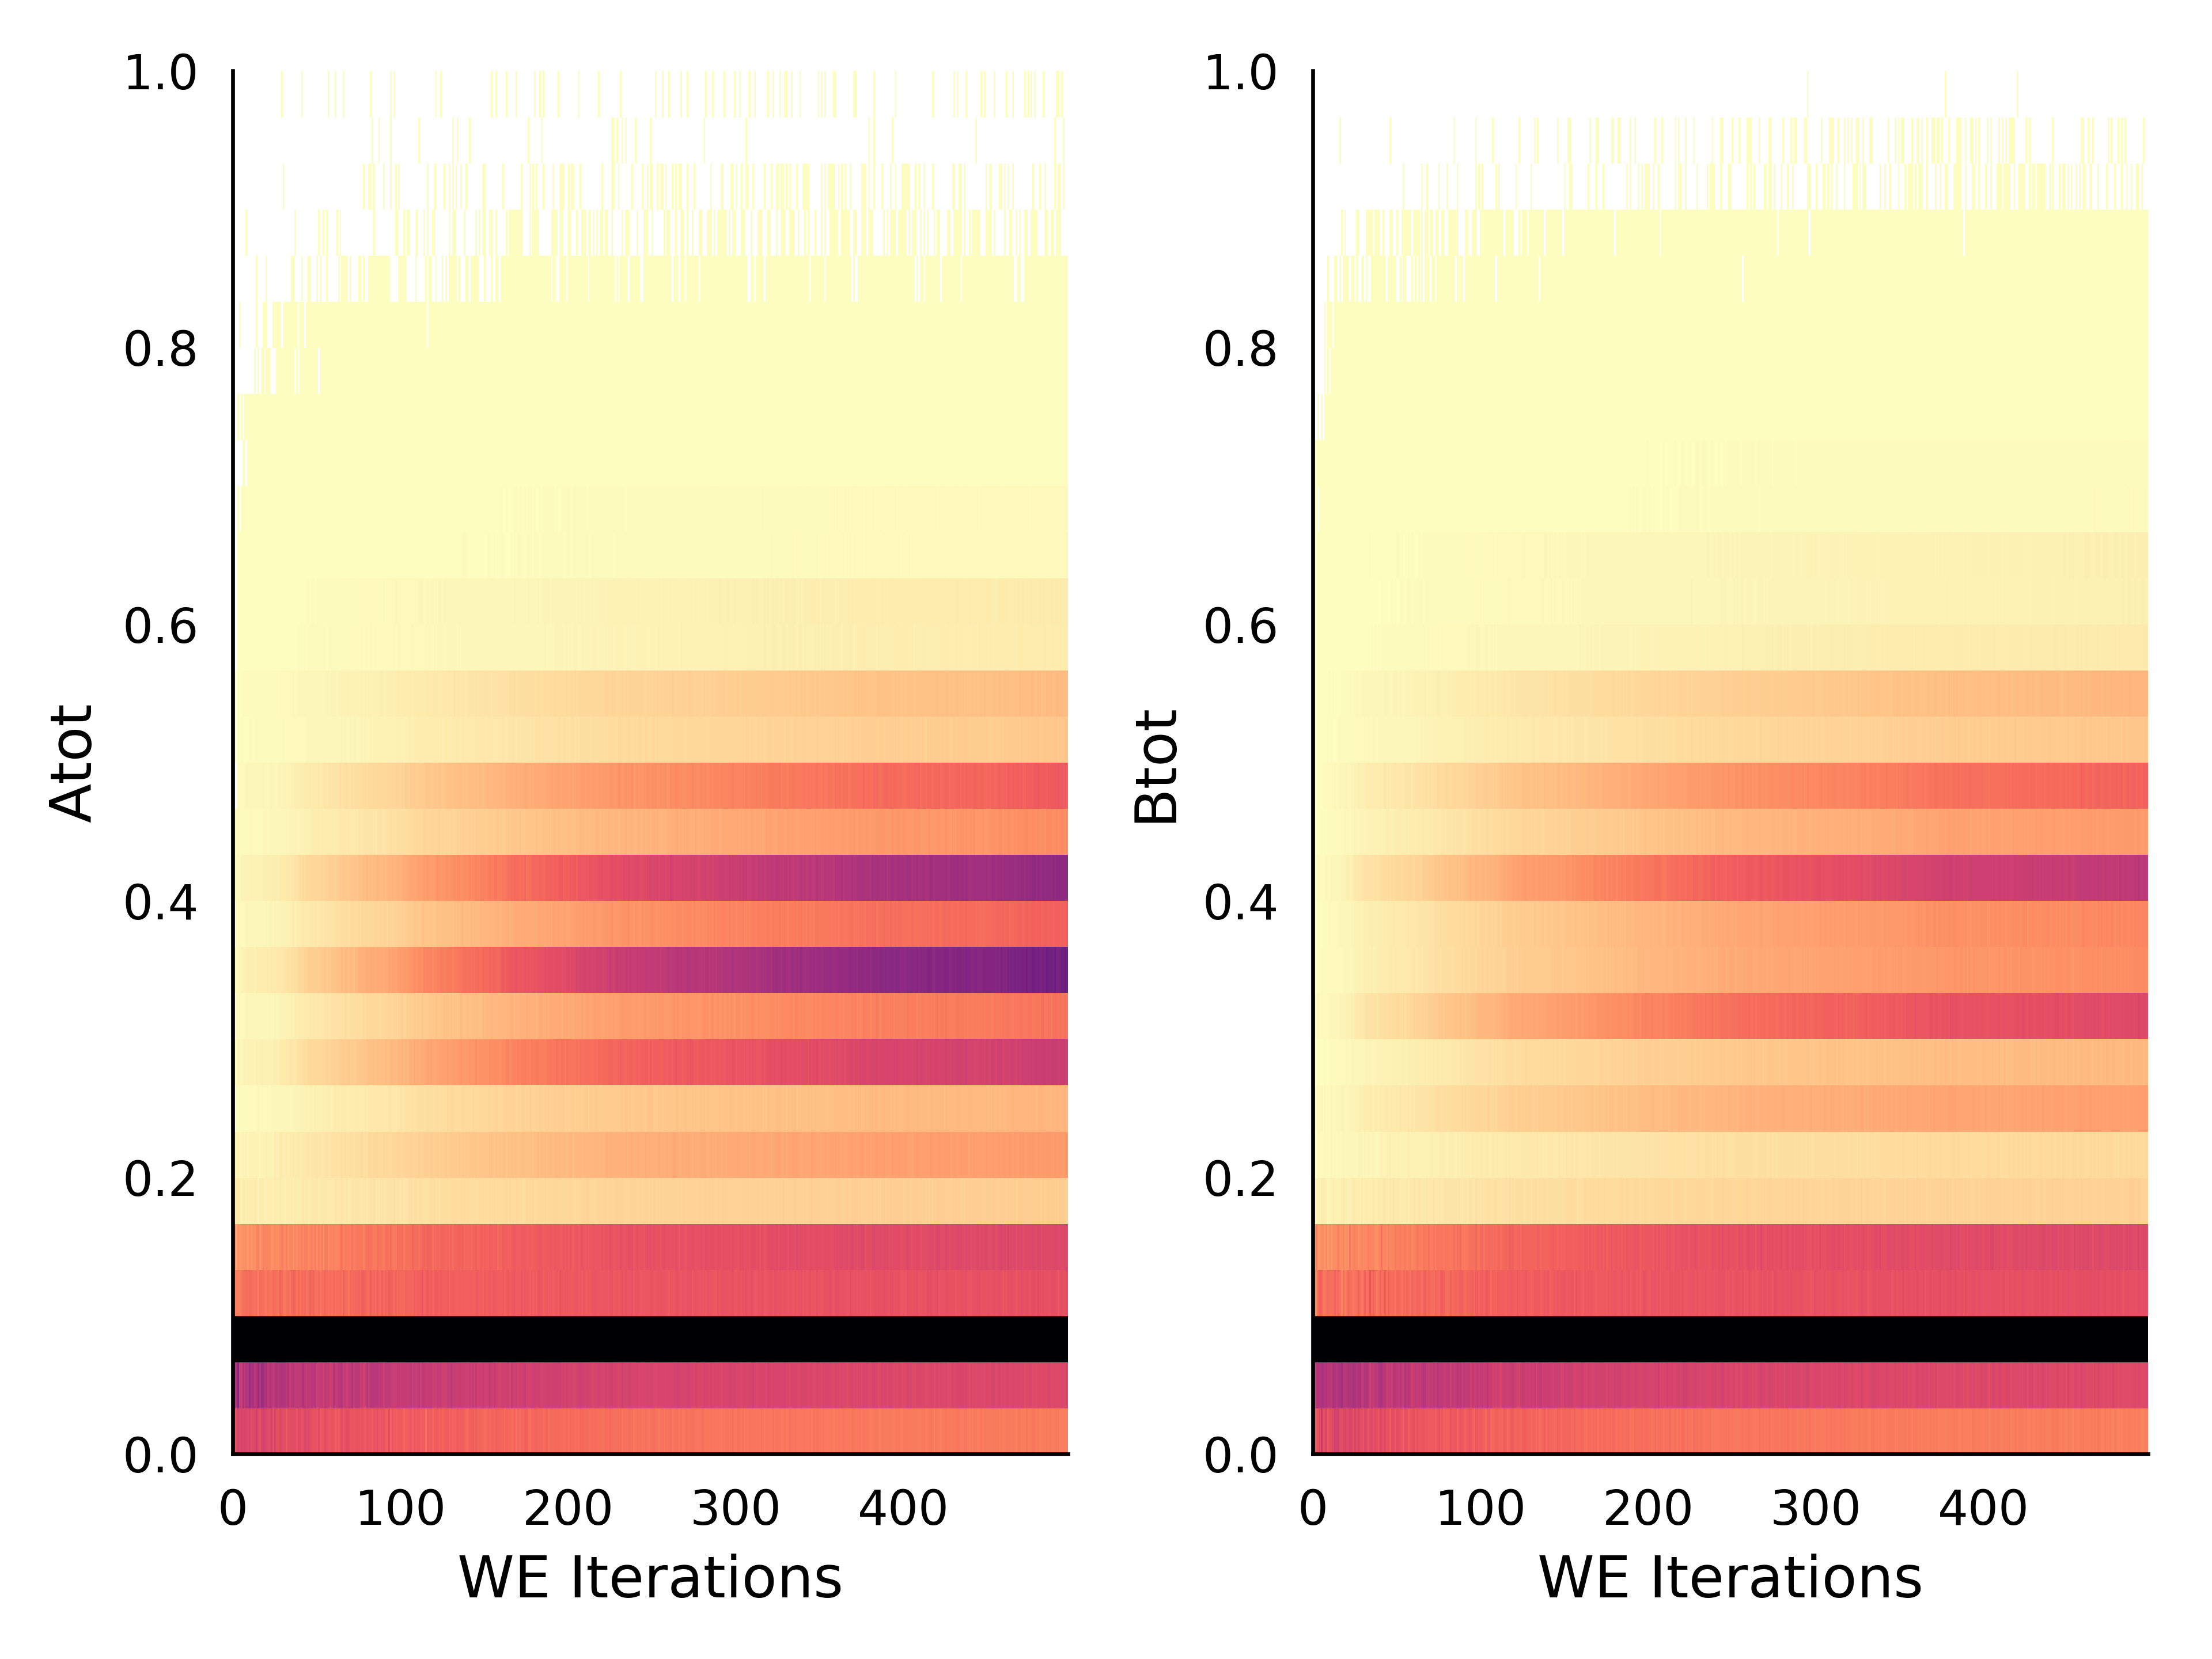

In [12]:
Image("evolution.png")